# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing & feature selection
# from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

# parameter tuning
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [2]:
orig = pd.read_csv('CompleteResponses.csv', header =0)

In [3]:
# create a working copy of the data
rawData = orig.copy()

# Pre-Process Dataset

In [4]:
rawData.head()

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 7 columns):
salary     9898 non-null float64
age        9898 non-null int64
elevel     9898 non-null int64
car        9898 non-null int64
zipcode    9898 non-null int64
credit     9898 non-null float64
brand      9898 non-null int64
dtypes: float64(2), int64(5)
memory usage: 541.4 KB


In [6]:
rawData.describe()

,salary,age,elevel,car,zipcode,credit,brand
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,1.982926,10.521924,4.040816,249175.966620,0.621742
std,37712.340836,17.596685,1.420562,5.771435,2.582058,145211.572531,0.484977
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,52082.106040,35.000000,1.000000,6.000000,2.000000,120806.813900,0.000000
50%,84949.735155,50.000000,2.000000,11.000000,4.000000,250607.146100,1.000000
75%,117162.043375,65.000000,3.000000,15.750000,6.000000,374639.701800,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.000000,1.000000


In [7]:
rawData.isnull().sum().sum()

0

# EDA

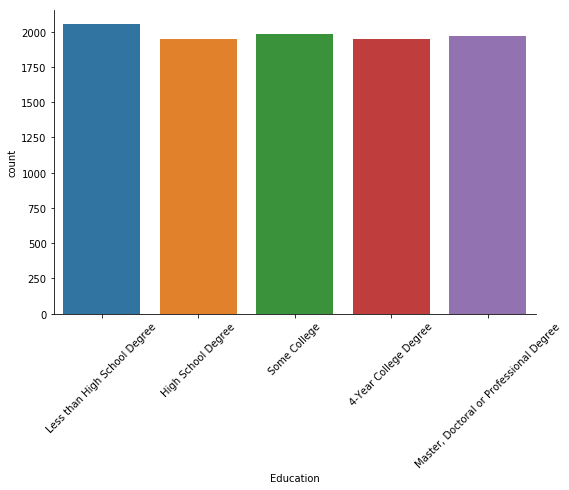

In [8]:
# histogram plot of Education  Levels using Seaborn
fg1 = sns.catplot('elevel', data=rawData, kind='count', aspect=1.5)
fg1.set_xlabels('Education')
fg1.set_xticklabels(['Less than High School Degree', 'High School Degree', 
                     'Some College', '4-Year College Degree', 
                     'Master, Doctoral or Professional Degree'])
plt.xticks(rotation=45)
plt.show()

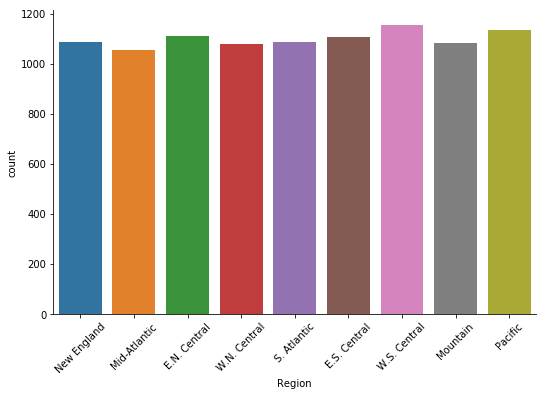

In [9]:
# histogram plot of Regions using Seaborn
fg2 = sns.catplot('zipcode', data=rawData, kind='count', aspect=1.5)
fg2.set_xlabels('Region')
fg2.set_xticklabels(['New England', 'Mid-Atlantic', 
                     'E.N. Central', 'W.N. Central', 
                     'S. Atlantic', 'E.S. Central', 
                     'W.S. Central', 'Mountain', 
                     'Pacific'])
plt.xticks(rotation=45)
plt.show()

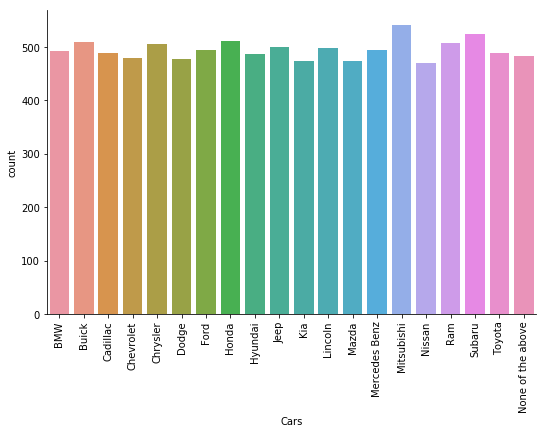

In [10]:
# histogram plot of Cars using Seaborn
fg3 = sns.catplot('car', data=rawData, kind='count', aspect=1.5)
fg3.set_xlabels('Cars')
fg3.set_xticklabels(['BMW', 'Buick', 'Cadillac', 'Chevrolet',
                     'Chrysler', 'Dodge', 'Ford', 'Honda', 
                     'Hyundai', 'Jeep', 'Kia', 'Lincoln', 
                     'Mazda', 'Mercedes Benz', 'Mitsubishi', 
                     'Nissan', 'Ram', 'Subaru', 'Toyota', 
                     'None of the above'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, "Distribution of Customers' Ages")

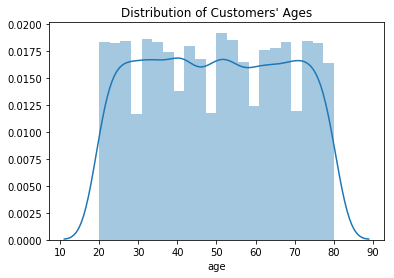

In [11]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(rawData['age'])
age_dist.set_title("Distribution of Customers' Ages")

Text(0.5, 1.0, "Distribution of Customers' Salary")

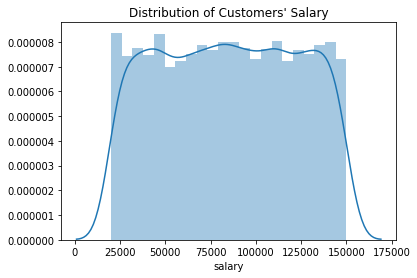

In [12]:
# Distribution of salary, with an overlay of a density plot
salary_dist = sns.distplot(rawData['salary'])
salary_dist.set_title("Distribution of Customers' Salary")

Text(0.5, 1.0, "Distribution of Customers' Credit")

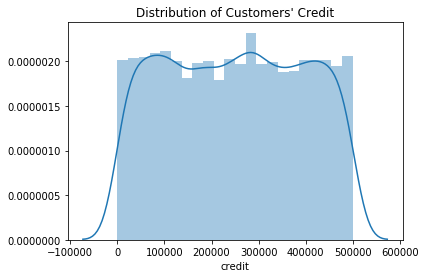

In [13]:
# Distribution of credit, with an overlay of a density plot
credit_dist = sns.distplot(rawData['credit'])
credit_dist.set_title("Distribution of Customers' Credit")

Text(0.5, 1.0, "Distribution of Customers' Cars")

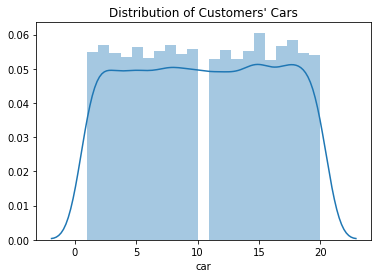

In [14]:
# Distribution of car, with an overlay of a density plot
car_dist = sns.distplot(rawData['car'])
car_dist.set_title("Distribution of Customers' Cars")

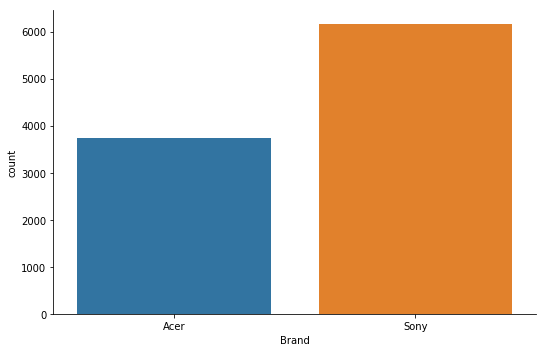

In [15]:
# histogram plot of Brand using Seaborn
fg4 = sns.catplot('brand', data=rawData, kind='count', aspect=1.5)
fg4.set_xlabels('Brand')
fg4.set_xticklabels(['Acer', 'Sony'])

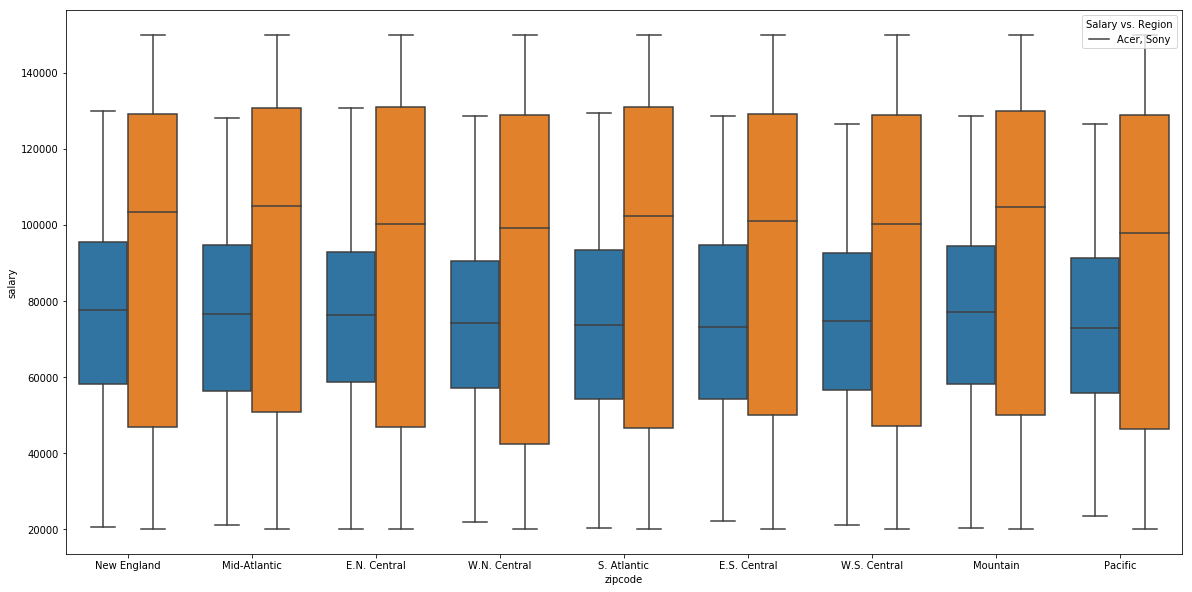

In [16]:
plt.figure(figsize=(20,10))
f1 = sns.boxplot(x="zipcode", y="salary", hue='brand', data=rawData)
plt.legend(title='Salary vs. Region', loc='upper right', 
           labels=['Acer, Sony'])
f1.set_xticklabels(['New England', 'Mid-Atlantic', 
                     'E.N. Central', 'W.N. Central', 
                     'S. Atlantic', 'E.S. Central', 
                     'W.S. Central', 'Mountain', 
                     'Pacific'])
plt.show()

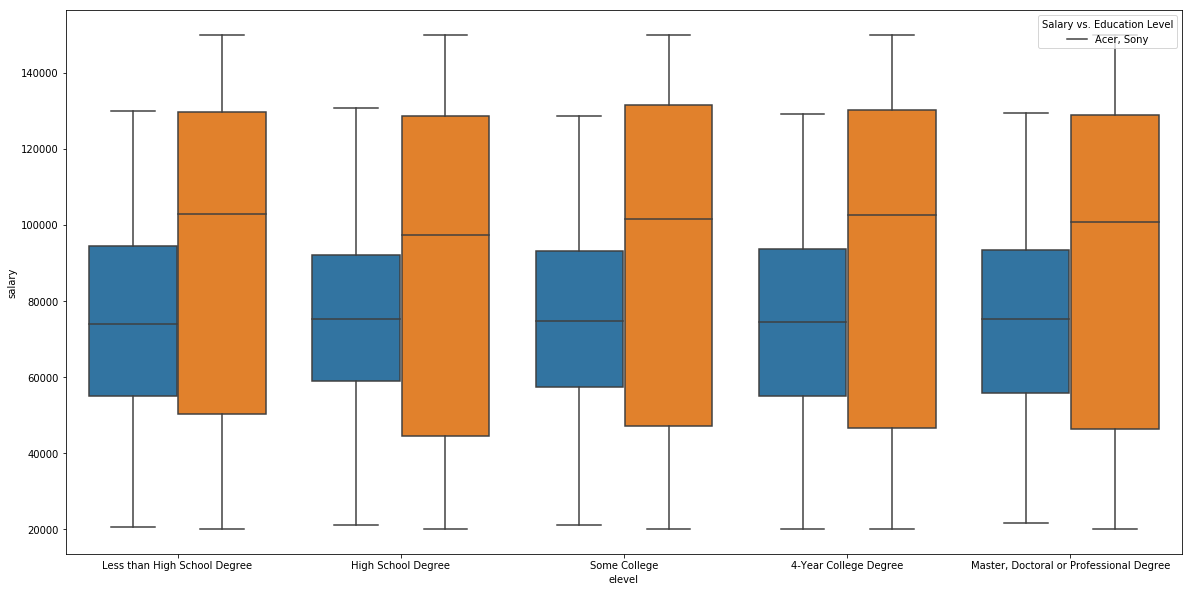

In [17]:
plt.figure(figsize=(20,10))
f2 = sns.boxplot(x="elevel", y="salary", hue='brand', data=rawData)
plt.legend(title='Salary vs. Education Level', loc='upper right', 
           labels=['Acer, Sony'])
f2.set_xticklabels(['Less than High School Degree', 'High School Degree', 
                     'Some College', '4-Year College Degree', 
                     'Master, Doctoral or Professional Degree'])
plt.show()

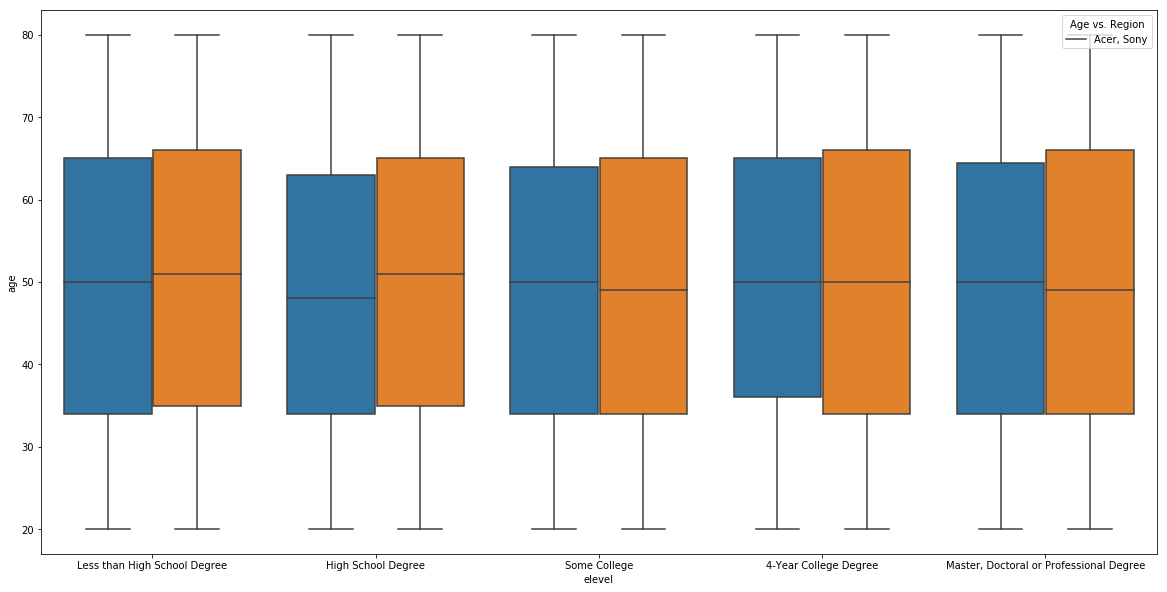

In [18]:
plt.figure(figsize=(20,10))
f3 = sns.boxplot(x="elevel", y="age", hue='brand', data=rawData)
plt.legend(title='Age vs. Region', loc='upper right', 
           labels=['Acer, Sony'])
f3.set_xticklabels(['Less than High School Degree', 'High School Degree', 
                     'Some College', '4-Year College Degree', 
                     'Master, Doctoral or Professional Degree'])
plt.show()

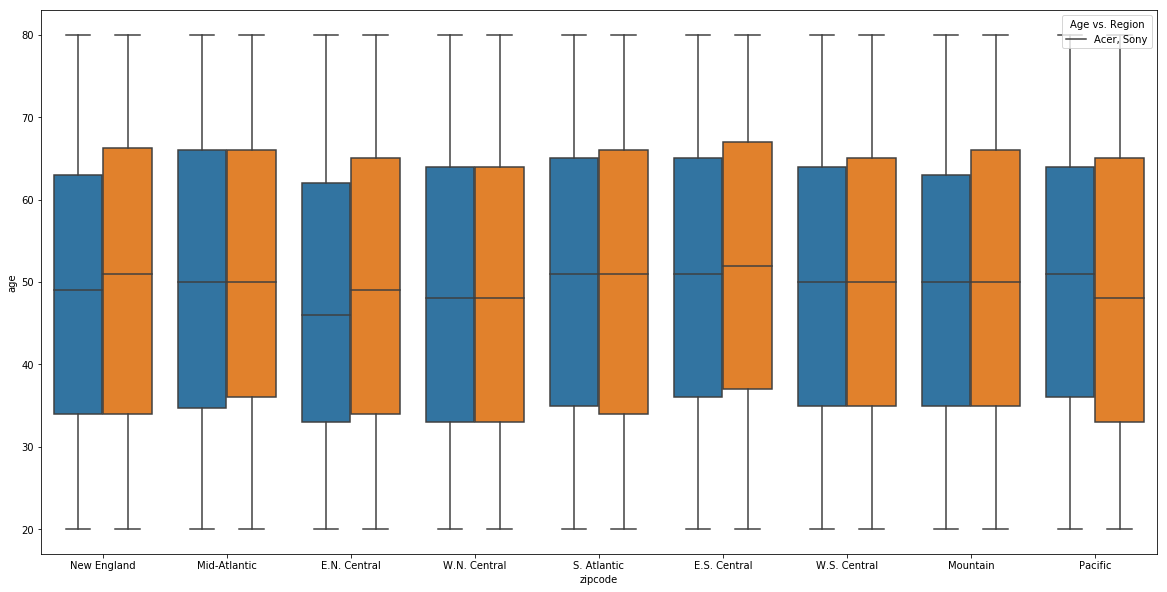

In [19]:
plt.figure(figsize=(20,10))
f4 = sns.boxplot(x="zipcode", y="age", hue='brand', data=rawData)
plt.legend(title='Age vs. Region', loc='upper right', 
           labels=['Acer, Sony'])
f4.set_xticklabels(['New England', 'Mid-Atlantic', 
                     'E.N. Central', 'W.N. Central', 
                     'S. Atlantic', 'E.S. Central', 
                     'W.S. Central', 'Mountain', 
                     'Pacific'])
plt.show()

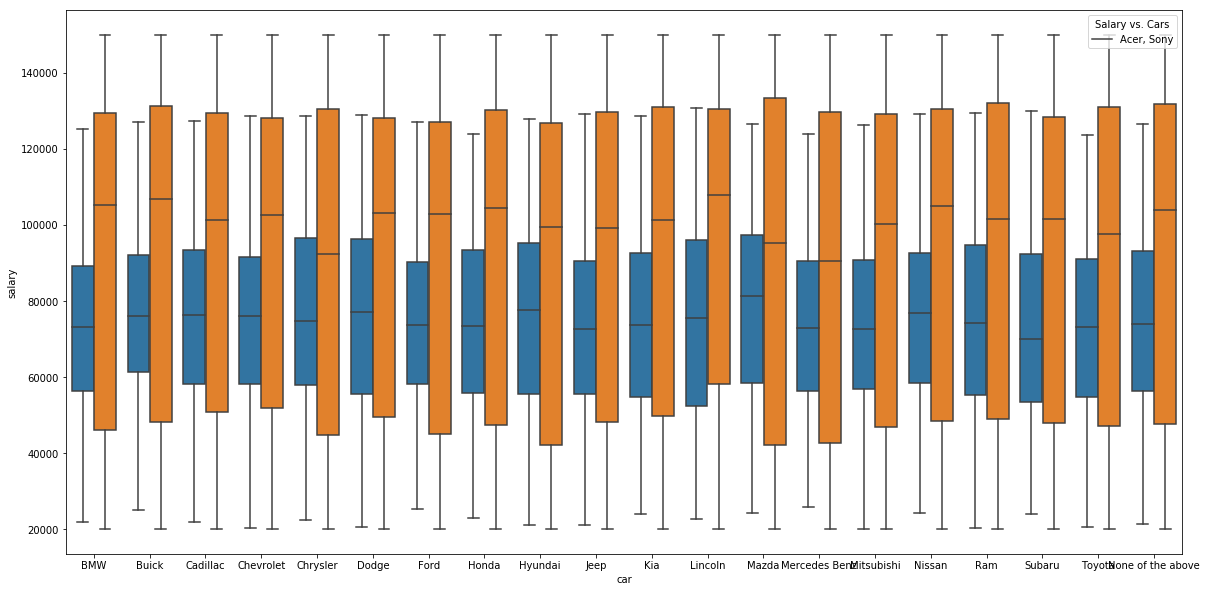

In [20]:
plt.figure(figsize=(20,10))
f4 = sns.boxplot(x="car", y="salary", hue='brand', data=rawData)
plt.legend(title='Salary vs. Cars', loc='upper right', 
           labels=['Acer, Sony'])
f4.set_xticklabels(['BMW', 'Buick', 'Cadillac', 'Chevrolet',
                     'Chrysler', 'Dodge', 'Ford', 'Honda', 
                     'Hyundai', 'Jeep', 'Kia', 'Lincoln', 
                     'Mazda', 'Mercedes Benz', 'Mitsubishi', 
                     'Nissan', 'Ram', 'Subaru', 'Toyota', 
                     'None of the above'])
plt.show()

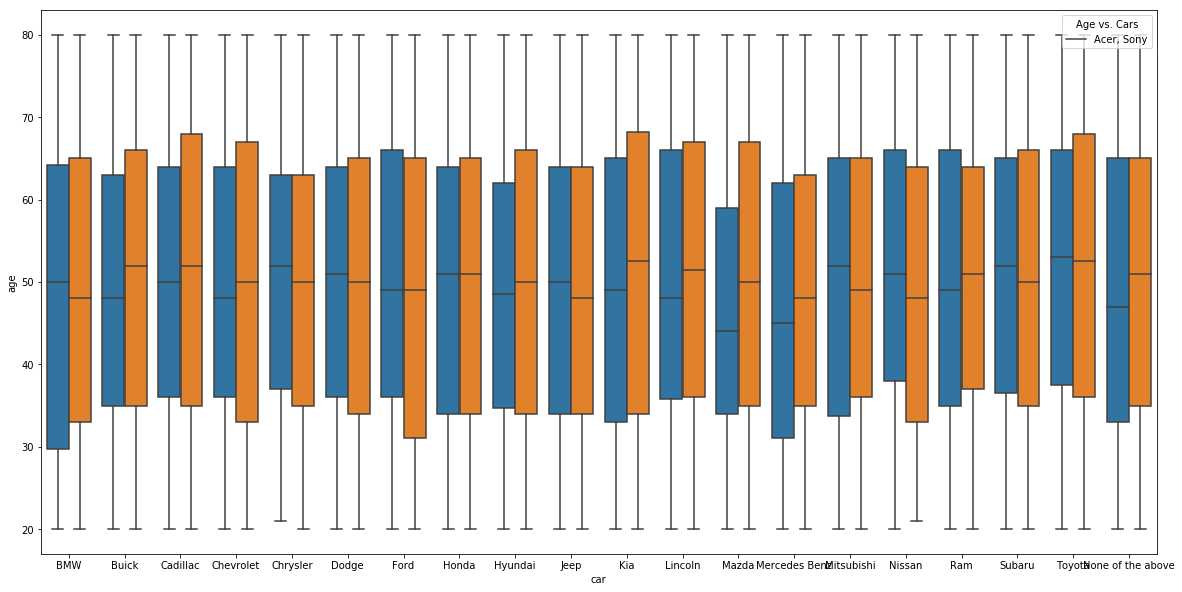

In [21]:
plt.figure(figsize=(20,10))
f5 = sns.boxplot(x="car", y="age", hue='brand', data=rawData)
plt.legend(title='Age vs. Cars', loc='upper right', 
           labels=['Acer, Sony'])
f5.set_xticklabels(['BMW', 'Buick', 'Cadillac', 'Chevrolet',
                     'Chrysler', 'Dodge', 'Ford', 'Honda', 
                     'Hyundai', 'Jeep', 'Kia', 'Lincoln', 
                     'Mazda', 'Mercedes Benz', 'Mitsubishi', 
                     'Nissan', 'Ram', 'Subaru', 'Toyota', 
                     'None of the above'])
plt.show()

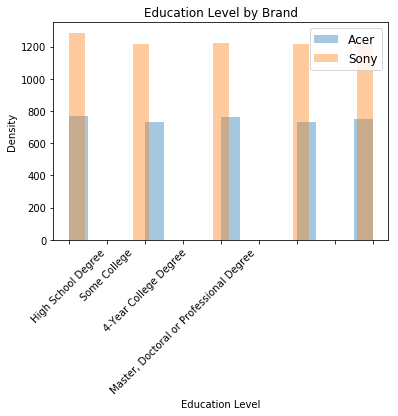

In [22]:
df = rawData[rawData.brand == 0]
h1 = sns.distplot(df['elevel'],  kde=False, label='Acer')
df = rawData[rawData.brand == 1]
h1 = sns.distplot(df['elevel'],  kde=False,label='Sony')

plt.legend(prop={'size': 12})
plt.title('Education Level by Brand')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
h1.set_xticklabels(['Less than High School Degree', 'High School Degree', 
                     'Some College', '4-Year College Degree', 
                     'Master, Doctoral or Professional Degree'])
plt.ylabel('Density')
plt.show()

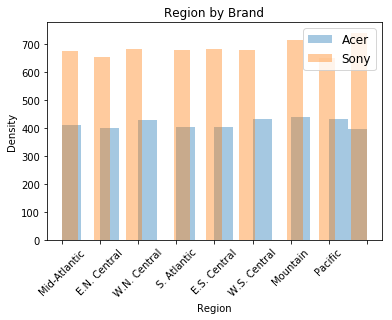

In [23]:
df = rawData[rawData.brand == 0]
h2 = sns.distplot(df['zipcode'],  kde=False, label='Acer')
df = rawData[rawData.brand == 1]
h2 = sns.distplot(df['zipcode'],  kde=False,label='Sony')

plt.legend(prop={'size': 12})
plt.title('Region by Brand')
plt.xlabel('Region')
plt.xticks(rotation=45)
h2.set_xticklabels(['New England', 'Mid-Atlantic', 
                     'E.N. Central', 'W.N. Central', 
                     'S. Atlantic', 'E.S. Central', 
                     'W.S. Central', 'Mountain', 
                     'Pacific'])
plt.ylabel('Density')
plt.show()

# Select Features & Dependent Variable

In [24]:
X = rawData.iloc[:,0:6]

In [25]:
X.head()

,salary,age,elevel,car,zipcode,credit
0,119806.54480,45,0,14,4,442037.71130
1,106880.47840,63,1,11,6,45007.17883
2,78020.75094,23,0,15,2,48795.32279
3,63689.93635,51,3,6,5,40888.87736
4,50873.61880,20,3,14,4,352951.49770


In [26]:
y = rawData['brand']

In [27]:
# One Hot Encode "elevel", "car", and "zipcode" columns
cat_columns = ['elevel', 'car', 'zipcode']
cat_columns_idx = [X.columns.get_loc(col) 
                   for col in cat_columns]
ohe = OneHotEncoder(categorical_features=cat_columns_idx, 
                    sparse=False, handle_unknown="ignore")
X_ohe = ohe.fit_transform(X)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Establish X / y train & test sets

In [28]:
# Original Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .25, random_state  =  123)

In [29]:
# One Hot Encoded Dataset
X_ohe_train, X_ohe_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size = .25, random_state  =  123)

# Model

## Decision Tree

In [30]:
# check Decision Tree base performance
dt = tree.DecisionTreeClassifier()
score_dt0 = cross_val_score(dt, X_train, y_train, cv=10)
print("Decision Tree - original dataset: %0.8f" % score_dt0.mean())
score_dt1 = cross_val_score(dt, X_ohe_train, y_train, cv=10)
print("Decision Tree - OHE dataset: %0.8f" % score_dt1.mean())

Decision Tree - original dataset: 0.89869030
Decision Tree - OHE dataset: 0.89936452


In [31]:
# Set Up Parameter Tuning
dt_param_grid = { 
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [100, 150, 200, 250, 300],
    'min_samples_split': [10, 50, 100, 150]
}
CV_dt0 = GridSearchCV(estimator=dt, param_grid=dt_param_grid, 
                      scoring='accuracy', n_jobs=-1, cv=10)
CV_dt1 = GridSearchCV(estimator=dt, param_grid=dt_param_grid, 
                      scoring='accuracy', n_jobs=-1, cv=10)

In [32]:
# check best paramters on original dataset
CV_dt0.fit(X_train, y_train)
print("Best score - original dataset: %0.8f" % CV_dt0.best_score_)
print("Best parameters set - original dataset:")
print(CV_dt0.best_params_)

Best score - original dataset: 0.91984373
Best parameters set - original dataset:
{'criterion': 'gini', 'min_samples_leaf': 100, 'min_samples_split': 10}


In [33]:
# check best paramters on OHE dataset
CV_dt1.fit(X_ohe_train, y_train)
print("Best score - OHE dataset: %0.8f" % CV_dt1.best_score_)
print("Best parameters set - OHE dataset:")
print(CV_dt1.best_params_)

Best score - OHE dataset: 0.91984373
Best parameters set - OHE dataset:
{'criterion': 'gini', 'min_samples_leaf': 100, 'min_samples_split': 10}


## Random Forest

In [34]:
# check Random Forest base performance
rf = RandomForestClassifier(n_estimators=10)
score_rf0 = cross_val_score(rf, X_train, y_train, cv=10)
print("RF - original dataset: %0.8f" % score_rf0.mean())
score_rf1 = cross_val_score(rf, X_ohe_train, y_train, cv=10)
print("RF - OHE dataset: %0.8f" % score_rf1.mean())

RF - original dataset: 0.91337745
RF - OHE dataset: 0.86851158


In [35]:
# Set Up Parameter Tuning
rf_param_grid = { 
    'bootstrap': ['True', 'False'],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 150, 200],
    'min_samples_leaf': [50, 100, 150, 200, 250, 300],
    'min_samples_split': [100, 200, 300, 400]
}
CV_rf0 = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                      scoring='accuracy', n_jobs=-1, cv=10)
CV_rf1 = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                      scoring='accuracy', n_jobs=-1, cv=10)

In [36]:
# check best paramters on original dataset
CV_rf0.fit(X_train, y_train)
print("Best score - original dataset: %0.8f" % CV_rf0.best_score_)
print("Best parameters set - original dataset:")
print(CV_rf0.best_params_)

Best score - original dataset: 0.91957430
Best parameters set - original dataset:
{'bootstrap': 'False', 'criterion': 'gini', 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 150}


In [37]:
# check best paramters on OHE dataset
CV_rf1.fit(X_ohe_train, y_train)
print("Best score - OHE dataset: %0.8f" % CV_rf1.best_score_)
print("Best parameters set - OHE dataset:")
print(CV_rf1.best_params_)

Best score - OHE dataset: 0.84628856
Best parameters set - OHE dataset:
{'bootstrap': 'True', 'criterion': 'gini', 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 150}


# Use Best Performing Model to Make Predictions & Check Performance

In [38]:
# Best performing model is Decision Tree. 
# The performance is the same on original dataset and One Hot Encoded dataset.
# Will use model ran on original dataset to make predictions.
predictions = CV_dt0.predict(X_test)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       939
           1       0.92      0.95      0.93      1536

   micro avg       0.92      0.92      0.92      2475
   macro avg       0.91      0.91      0.91      2475
weighted avg       0.92      0.92      0.92      2475



In [40]:
print(confusion_matrix(y_test, predictions))

[[ 816  123]
 [  83 1453]]


In [41]:
accuracy = accuracy_score(y_test, predictions)
bal_accuracy = balanced_accuracy_score(y_test, predictions)
print('Accuray: %.3f' % accuracy)
print('Balanced Accuracy: %.3f' % bal_accuracy)

Accuray: 0.917
Balanced Accuracy: 0.907


In [42]:
model = tree.DecisionTreeClassifier(**CV_dt0.best_params_)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
important_features = pd.Series(data=model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

age        0.579167
salary     0.420769
credit     0.000063
zipcode    0.000000
car        0.000000
elevel     0.000000
dtype: float64


   # Import Incomplete Survey Dataset & Make Predictions
  

In [44]:
SurveyIncomplete = pd.read_csv('SurveyIncomplete.csv', header =0)

In [45]:
SurveyIncomplete.describe()

,salary,age,elevel,car,zipcode,credit,brand
count,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000,5000.000000
mean,85793.810549,49.935800,2.00920,10.60460,4.03760,249546.214730,0.012600
std,37800.008573,17.665925,1.41206,5.80467,2.56747,145859.260007,0.111551
min,20000.000000,20.000000,0.00000,1.00000,0.00000,0.000000,0.000000
25%,52589.960977,35.000000,1.00000,6.00000,2.00000,122310.705600,0.000000
50%,86220.717695,50.000000,2.00000,11.00000,4.00000,250973.693550,0.000000
75%,118535.161750,65.000000,3.00000,16.00000,6.00000,375652.704825,0.000000
max,150000.000000,80.000000,4.00000,20.00000,8.00000,500000.000000,1.000000


In [46]:
X_incomplete = SurveyIncomplete.iloc[:,0:6]
X_incomplete.head()

,salary,age,elevel,car,zipcode,credit
0,150000.00000,76,1,3,3,377980.1016
1,82523.83897,51,1,8,3,141657.6066
2,115646.63620,34,0,10,2,360980.3585
3,141443.39330,22,3,18,2,282736.3191
4,149211.27030,56,0,5,3,215667.2896


In [47]:
incomplete = CV_dt0.predict(X_incomplete)

In [48]:
SurveyIncomplete['brand'] = incomplete

In [49]:
SurveyIncomplete.describe()

,salary,age,elevel,car,zipcode,credit,brand
count,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000,5000.000000
mean,85793.810549,49.935800,2.00920,10.60460,4.03760,249546.214730,0.631000
std,37800.008573,17.665925,1.41206,5.80467,2.56747,145859.260007,0.482582
min,20000.000000,20.000000,0.00000,1.00000,0.00000,0.000000,0.000000
25%,52589.960977,35.000000,1.00000,6.00000,2.00000,122310.705600,0.000000
50%,86220.717695,50.000000,2.00000,11.00000,4.00000,250973.693550,1.000000
75%,118535.161750,65.000000,3.00000,16.00000,6.00000,375652.704825,1.000000
max,150000.000000,80.000000,4.00000,20.00000,8.00000,500000.000000,1.000000


In [50]:
brand = SurveyIncomplete['brand'].value_counts()

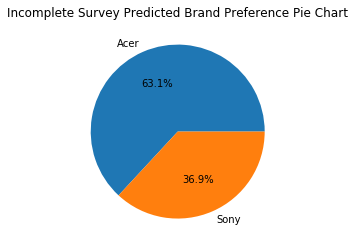

In [51]:
labels = 'Acer', 'Sony'
plt.pie(brand, labels=labels, autopct='%1.1f%%')
plt.title('Incomplete Survey Predicted Brand Preference Pie Chart')
plt.show()